In [1]:
import chardet
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/en/2020_up1/2020_up1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_up1/2020_up1_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_up1/2020_up1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_up1/2020_up1_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
#print(text)



In [3]:
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

11627

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

11627


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"leed" + 0.000*"mbodience" + 0.000*"mitbegründer" + 0.000*"wachedi" + 0.000*"schloss" + 0.000*"beseitigt" + 0.000*"infrastruktur" + 0.000*"pattani"')
(1, '0.000*"platformsfirst" + 0.000*"drift" + 0.000*"perception" + 0.000*"directorgeneral" + 0.000*"serey" + 0.000*"chea" + 0.000*"flavor" + 0.000*"bestproven"')
(2, '0.000*"unfazed" + 0.000*"devastate" + 0.000*"eips" + 0.000*"polotsky" + 0.000*"outsource" + 0.000*"unforeseen" + 0.000*"abbc" + 0.000*"gochain"')
(3, '0.000*"recognizable" + 0.000*"admission" + 0.000*"agreedupon" + 0.000*"warchest" + 0.000*"fitness" + 0.000*"statelaw" + 0.000*"\'grandfathering" + 0.000*"paperintensive"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

11627

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

11627

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

1039.6784521705988

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

0.9686076123023614

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.8033245309298475

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
34,"[-0.015496674925088882, 0.039111390709877014, ...",crypto,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.016618,0.183853,0.832764,NaN
708,"[0.010801482945680618, -0.06891921162605286, 0...",company,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.022352,0.096875,0.925477,NaN
84,"[-0.035484228283166885, -0.04295532405376434, ...",make,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.029943,0.104402,0.925541,NaN
55,"[0.04932689666748047, -0.17510178685188293, 0....",cryptocurrencies,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.019920,0.084051,0.935868,NaN
229,"[-0.013780581764876842, -0.10888803750276566, ...",exchange,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.058335,0.122104,0.936231,NaN
59,"[-0.05534224584698677, -0.15921980142593384, -...",include,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.003563,0.053804,0.949760,NaN
902,"[0.017763204872608185, 0.08444151282310486, -0...",user,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.021323,0.071506,0.949817,NaN
274,"[-0.01816440187394619, -0.04180121049284935, -...",people,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.006277,0.055337,0.950940,NaN
164,"[0.03369271010160446, -0.9360193610191345, -0....",digital,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.097057,0.142873,0.954184,NaN
266,"[-0.0244427677243948, -0.16127648949623108, 0....",firm,0,"[-0.0040684235, -0.020616172, 0.0001295269, 0....",0.005078,0.047253,0.957825,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1839,"[-0.12920205295085907, -0.16145719587802887, 0...",claim,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.001610,0.041538,0.960072,NaN
585,"[-0.11305832117795944, -0.12139638513326645, 0...",tell,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.003452,0.035405,0.968047,NaN
234,"[-0.09960326552391052, 0.17549480497837067, 0....",report,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.046892,0.078336,0.968556,NaN
50,"[-0.11074040830135345, -0.07646775990724564, 0...",think,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.006366,0.037077,0.969289,NaN
29,"[-0.14365296065807343, -0.1208924874663353, 0....",write,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.004891,0.028575,0.976316,NaN
889,"[-0.07593094557523727, -0.0876239687204361, 0....",know,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.010958,0.033314,0.977645,NaN
660,"[-0.0969211682677269, -0.14877139031887054, 0....",explain,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.003535,0.021466,0.982069,NaN
1580,"[-0.12299363315105438, -0.19622482359409332, 0...",file,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.002295,0.020072,0.982223,NaN
1084,"[-0.06825040280818939, -0.05190198868513107, 0...",industry,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.016791,0.034150,0.982641,NaN
282,"[-0.06350844353437424, -0.06996700167655945, -...",development,1,"[-0.013740341, -0.019736571, 0.005418454, 0.07...",0.015291,0.032617,0.982674,NaN


In [62]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(50)   # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[-0.052866559475660324, 0.06435766816139221, -...",cryptocurrency,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.059253,0.123359,0.935895,NaN
136,"[-0.15245652198791504, -0.11446049809455872, -...",take,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.001950,0.062028,0.939922,NaN
85,"[-0.12195895612239838, 0.013743619434535503, -...",accord,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.014507,0.056174,0.958334,NaN
62,"[-0.13311894237995148, 0.13278913497924805, -0...",come,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.022527,0.059937,0.962590,NaN
147,"[-0.13185393810272217, -0.20315825939178467, -...",hold,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.021393,0.056313,0.965080,NaN
209,"[-0.13143296539783478, -0.11386281996965408, -...",lead,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.001629,0.034708,0.966921,NaN
257,"[-0.14118637144565582, -0.17030243575572968, -...",give,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.006311,0.038750,0.967561,NaN
712,"[-0.13248397409915924, -0.15773272514343262, -...",mean,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.005356,0.035126,0.970230,NaN
173,"[-0.17865310609340668, -0.0652855783700943, -0...",change,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.005980,0.034150,0.971830,NaN
36,"[-0.1294240653514862, -0.12740866839885712, -0...",note,2,"[-0.01739748, -0.015210892, -0.0146913035, 0.0...",0.004072,0.030944,0.973128,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.17418068647384644, 0.08481800556182861, -0...",bitcoin,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.060142,0.527446,0.532696,NaN
2,"[-0.44500142335891724, -0.15686476230621338, -...",price,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.033566,0.224834,0.808732,NaN
11,"[-0.23802657425403595, -0.09934283047914505, -...",market,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.032015,0.175211,0.856804,NaN
17,"[-0.21969781816005707, 0.10066120326519012, -0...",time,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.019255,0.098966,0.920290,NaN
12,"[-0.390319287776947, -0.25145626068115234, -0....",move,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.013274,0.089627,0.923648,NaN
248,"[-0.3277819752693176, -0.20100407302379608, -0...",support,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.009271,0.082100,0.927171,NaN
121,"[-0.3241710364818573, -0.13781054317951202, -0...",show,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.002409,0.055058,0.947350,NaN
24,"[-0.5341231822967529, -0.35805419087409973, -0...",level,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.025633,0.076106,0.949526,NaN
647,"[-0.5000290870666504, -0.2486230581998825, -0....",source,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.012561,0.057428,0.955133,NaN
223,"[-0.3383006751537323, 0.06480433791875839, -0....",week,3,"[-0.03834472, -0.017212162, -0.044038046, 0.09...",0.014026,0.058264,0.955762,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

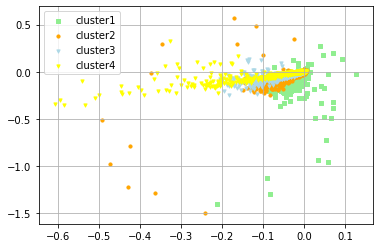

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

1950

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

5376

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 긍정

3176

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

1125

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 #  인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 1 #  긍정
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

3193.608400830724

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 0 2 ... 1 1 1]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3193.6084


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.75857633


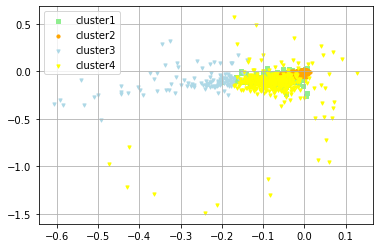

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 사회적 시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3697,"[-0.042891450226306915, -0.04153147712349892, ...",algorithm,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.068207,0.003206,1.065002,NaN
3357,"[-0.044379811733961105, -0.03825661540031433, ...",final,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.072232,0.003763,1.068468,NaN
816,"[-0.04907738417387009, -0.06333920359611511, -...",metal,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.073266,0.003206,1.070060,NaN
3312,"[-0.04108074679970741, -0.04270416125655174, -...",light,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.075956,0.004739,1.071217,NaN
1102,"[-0.0483468733727932, -0.057784635573625565, -...",count,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.081260,0.002788,1.078473,NaN
7581,"[-0.04539220407605171, -0.052567966282367706, ...",mcafee,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.081127,0.001951,1.079176,NaN
3595,"[-0.04124622419476509, -0.060096271336078644, ...",suit,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.086890,0.003067,1.083823,NaN
1456,"[-0.04793704301118851, -0.057521287351846695, ...",john,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.090650,0.003206,1.087444,NaN
639,"[-0.04488757625222206, -0.05529479682445526, -...",encourage,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.092843,0.004600,1.088243,NaN
4146,"[-0.048189595341682434, -0.06562121212482452, ...",structure,0,"[-0.04798852, -0.057059444, -0.01617727, 0.221...",0.097932,0.004600,1.093332,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5438,"[-0.008242571726441383, -0.005151727236807346,...",jonas,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.026780,0.000418,1.026362,NaN
11058,"[-0.006900569889694452, -0.010395410470664501,...",elle,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.027852,0.000139,1.027712,NaN
9738,"[-0.005694819148629904, -0.012494145892560482,...",estatal,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.028102,0.000139,1.027963,NaN
8955,"[-0.0037713933270424604, -0.004645128734409809...",soapopera,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.028587,0.000139,1.028447,NaN
2528,"[-0.0037680177483707666, -0.003248313674703240...",adamant,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.028740,0.000279,1.028461,NaN
8078,"[-0.008722557686269283, -0.00892692618072033, ...",ramadan,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.028741,0.000139,1.028601,NaN
8758,"[-0.009893814101815224, -0.012159970588982105,...",raymond,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.029008,0.000279,1.028729,NaN
4748,"[-0.009192531928420067, -0.006150074768811464,...",ante,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.029037,0.000279,1.028759,NaN
10965,"[-0.010452775284647942, -0.005451747681945562,...",punishment,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.029224,0.000139,1.029085,NaN
8762,"[-0.008027288131415844, -0.002613767748698592,...",vocabulary,1,"[-0.00579472, -0.0075766044, -0.00080205593, 0...",0.029633,0.000139,1.029494,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 긍정적 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
52,"[-0.2663111686706543, -0.07011649012565613, -0...",recent,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.327917,0.030805,1.297112,NaN
42,"[-0.27490678429603577, -0.14988426864147186, -...",strong,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.329227,0.027460,1.301768,NaN
88,"[-0.26764023303985596, -0.14605094492435455, -...",suggest,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.360909,0.029829,1.331080,NaN
507,"[-0.24640363454818726, -0.1424386352300644, -0...",sign,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.532809,0.021605,1.511204,NaN
381,"[-0.28285086154937744, -0.11798085272312164, -...",positive,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.539559,0.021884,1.517675,NaN
148,"[-0.2410724014043808, -0.1853266954421997, -0....",position,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.554947,0.024532,1.530415,NaN
537,"[-0.23441508412361145, -0.13656459748744965, -...",range,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.596657,0.019654,1.577003,NaN
40,"[-0.20946745574474335, -0.11137504130601883, -...",current,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.653229,0.029969,1.623260,NaN
99,"[-0.2499743551015854, -0.11719100177288055, -0...",push,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.655827,0.024114,1.631713,NaN
421,"[-0.26694372296333313, -0.16676154732704163, -...",remain,2,"[-0.25918448, -0.10345892, -0.28953338, 0.6448...",0.751797,0.035544,1.716253,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1952,"[-0.08114393800497055, -0.10514800995588303, -...",team,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.183913,0.017005,1.166908,NaN
1971,"[-0.059042513370513916, -0.13491179049015045, ...",online,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.247240,0.013381,1.233859,NaN
215,"[-0.0930805504322052, -0.14246435463428497, -0...",name,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.261632,0.012406,1.249227,NaN
1883,"[-0.08133576065301895, -0.1227613091468811, 0....",problem,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.283674,0.010733,1.272942,NaN
1009,"[-0.07109469175338745, -0.10045550018548965, 0...",consumer,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.294550,0.014078,1.280472,NaN
426,"[-0.06654636561870575, -0.06936565041542053, 0...",power,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.310924,0.017284,1.293640,NaN
322,"[-0.09125743061304092, -0.15871798992156982, -...",control,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.319601,0.020629,1.298971,NaN
1408,"[-0.08897411823272705, -0.10546381771564484, 0...",feature,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.317504,0.014775,1.302729,NaN
1679,"[-0.0864553153514862, -0.1017376109957695, 0.0...",question,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.325173,0.014915,1.310258,NaN
1681,"[-0.08735062927007675, -0.10006324201822281, -...",send,3,"[-0.07866634, -0.13034514, -0.0144827785, 0.54...",0.327582,0.016169,1.311413,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적 시도 

1219

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #인플

9850

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #긍정

115

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #협업

443

In [89]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 1 # 긍정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 8 # 협업

In [90]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.75857633
temp_cluster_result['Silhouette'] = 0.75857633

In [92]:
temp_cluster_result1.to_csv("../cluster/en_news/2020_up1/en_news_2020_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2020_up1/en_news_2020_up1_cosine.csv")

In [86]:
word_vectors = model.wv

In [87]:
vocabs = word_vectors.vocab.keys()

In [88]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [89]:
print(word_vectors.similarity(w1='little',w2='push'))

0.92550874


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [91]:
xys

array([[-0.5680961 ,  0.0545366 ],
       [ 2.50050079,  0.29734324],
       [ 6.55864352,  5.98708902],
       ...,
       [-0.48589998,  0.0281039 ],
       [-0.44965773,  0.0346795 ],
       [-0.52126418,  0.02389634]])

In [92]:
xys[:,0]

array([-0.5680961 ,  2.50050079,  6.55864352, ..., -0.48589998,
       -0.44965773, -0.52126418])

In [93]:
xys[:,1]

array([0.0545366 , 0.29734324, 5.98708902, ..., 0.0281039 , 0.0346795 ,
       0.02389634])

In [94]:
xs = xys[:,0]
ys = xys[:,1]

In [95]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9975 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127935 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3

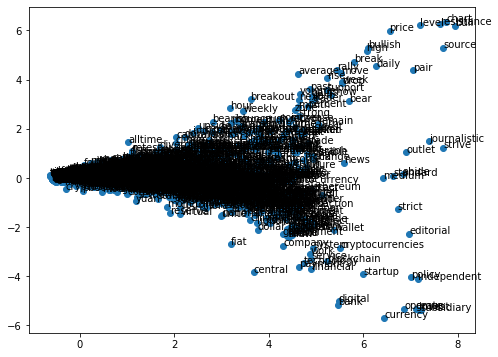

In [96]:
plot_2d_graph(vocabs,xs,ys)

In [97]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>